📊 Features shape: (3742, 3774)
👥 Customers: 3742
🔧 Features per customer: 3774

FEATURE TYPE ANALYSIS
🔢 Numeric features: 22
🏷️ One-hot encoded features: 3752
📈 Total features: 3774

TOP 20 FEATURES BY VARIANCE
Top 20 features by variance:
 1. avg_amount                     variance: 1.0003
 2. total_amount                   variance: 1.0003
 3. unique_days                    variance: 1.0003
 4. total_transactions             variance: 1.0003
 5. median_amount                  variance: 1.0003
 6. min_amount                     variance: 1.0003
 7. max_amount                     variance: 1.0003
 8. total_value                    variance: 1.0003
 9. avg_value                      variance: 1.0003
10. avg_transactions_per_day       variance: 1.0003
11. negative_amount_ratio          variance: 1.0003
12. transactions_per_month         variance: 1.0003
13. days_since_last_transaction    variance: 1.0003
14. fraud_ratio                    variance: 1.0003
15. transaction_hour_std        

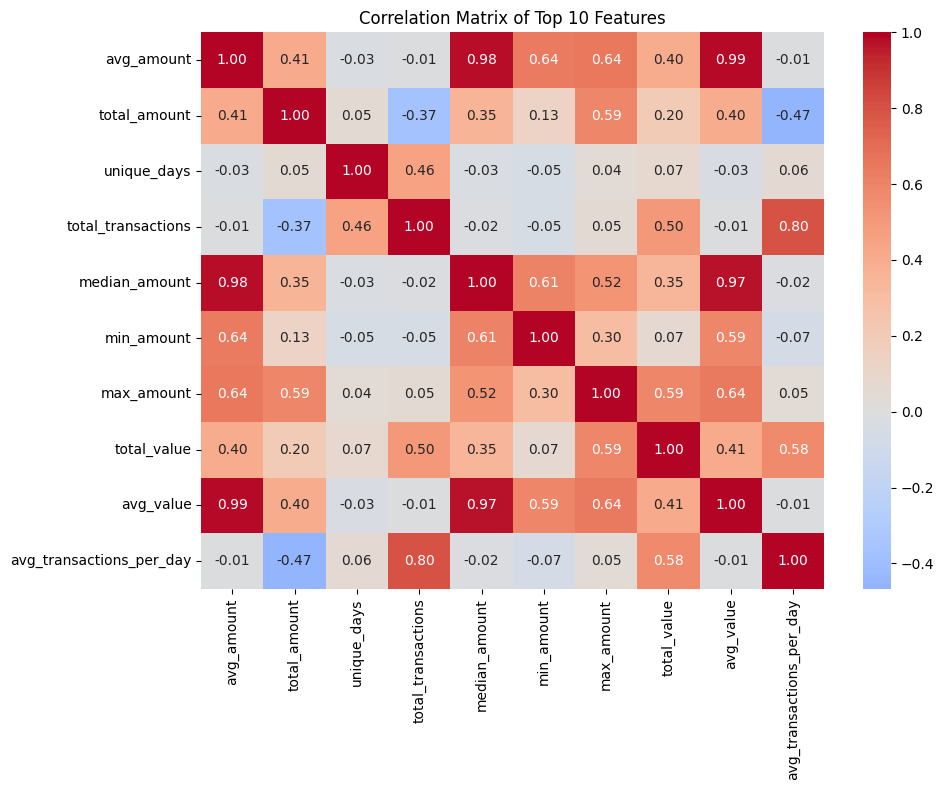


FEATURE DISTRIBUTIONS


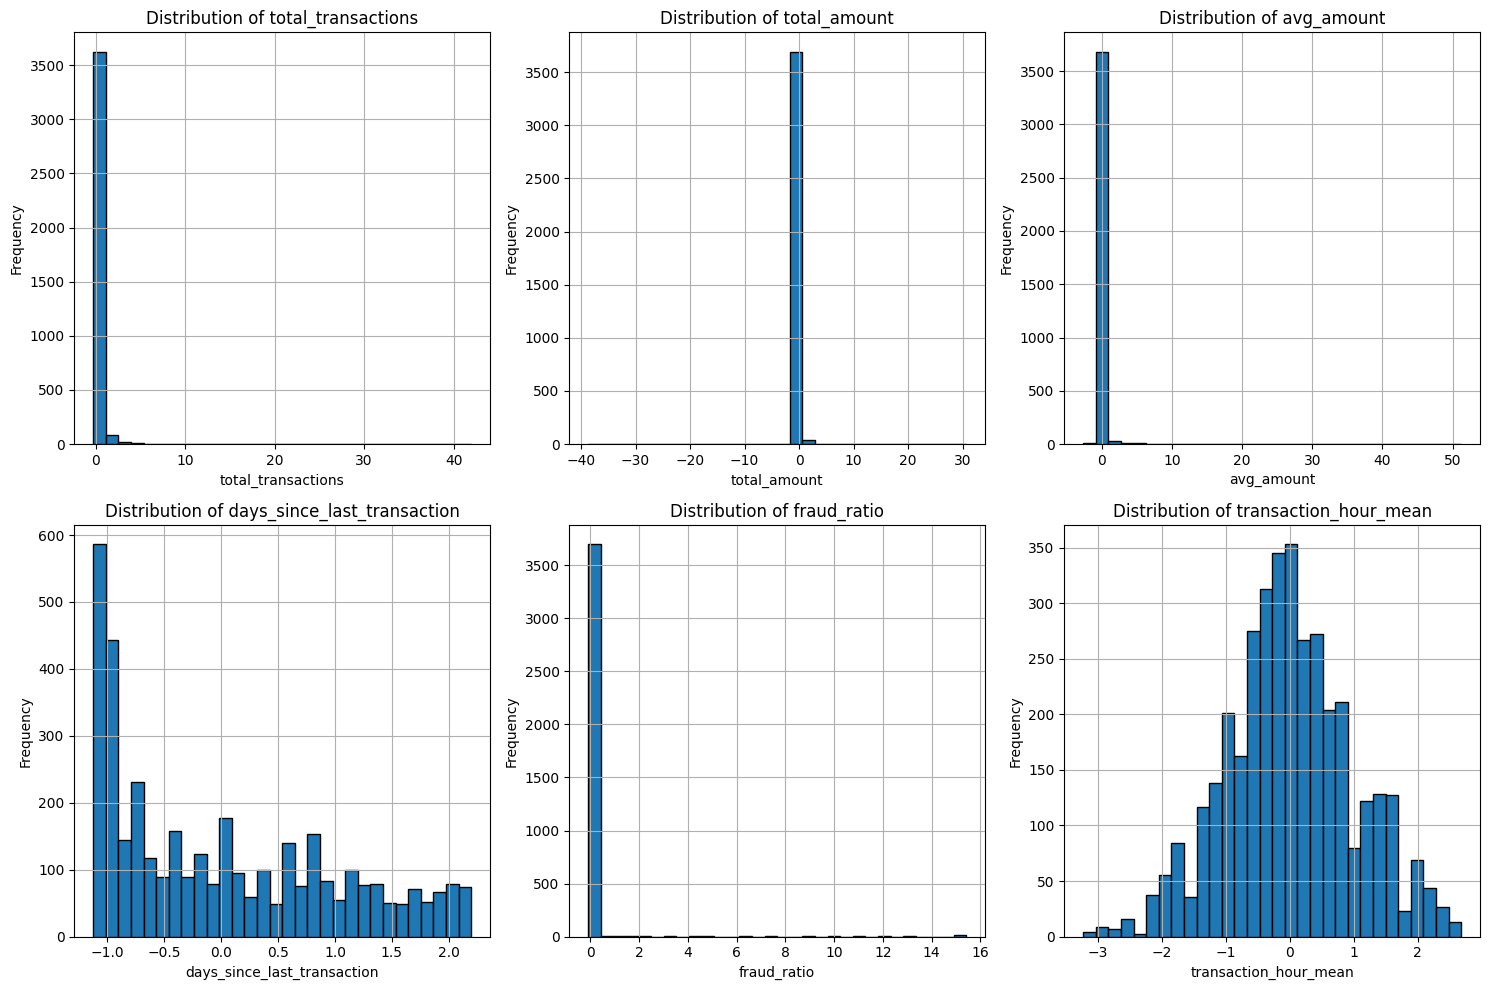


FEATURE ENGINEERING SUMMARY
📋 Feature Categories Created:

• RFM Features:
  - total_transactions
  - unique_days
  - total_amount
  - avg_amount
  - days_since_last_transaction
  ... and 1 more

• Transaction Statistics:
  - median_amount
  - min_amount
  - max_amount
  - std_amount
  - total_value
  ... and 1 more

• Behavioral Patterns:
  - avg_transactions_per_day
  - negative_transaction_count
  - negative_amount_ratio
  - transaction_hour_mean
  - transaction_hour_std
  ... and 1 more

• Risk Indicators:
  - fraud_count
  - fraud_ratio

• Categorical Encodings:
  - preferred_category_*
  - preferred_channel_*


In [2]:
# Feature Analysis Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load features
features = pd.read_csv('../data/processed/features.csv')
print(f"📊 Features shape: {features.shape}")
print(f"👥 Customers: {features.shape[0]}")
print(f"🔧 Features per customer: {features.shape[1]}")

# 1. Feature Types Analysis
print("\n" + "="*60)
print("FEATURE TYPE ANALYSIS")
print("="*60)

# Count feature types
numeric_cols = features.select_dtypes(include=[np.number]).columns
categorical_prefixes = ['preferred_category_', 'preferred_channel_', 'CustomerId_']
categorical_cols = [col for col in features.columns 
                    if any(prefix in col for prefix in categorical_prefixes)]

print(f"🔢 Numeric features: {len(numeric_cols)}")
print(f"🏷️ One-hot encoded features: {len(categorical_cols)}")
print(f"📈 Total features: {len(features.columns)}")

# 2. Most Important Features (Variance)
print("\n" + "="*60)
print("TOP 20 FEATURES BY VARIANCE")
print("="*60)

# Calculate variance for numeric features
variances = features[numeric_cols].var().sort_values(ascending=False)
print("Top 20 features by variance:")
for i, (feature, var) in enumerate(variances.head(20).items()):
    print(f"{i+1:2d}. {feature:30} variance: {var:.4f}")

# 3. Feature Correlations
print("\n" + "="*60)
print("FEATURE CORRELATIONS")
print("="*60)

# Calculate correlations among top 10 numeric features
top_features = variances.head(10).index.tolist()
correlation_matrix = features[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 10 Features')
plt.tight_layout()
plt.show()

# 4. Feature Distributions
print("\n" + "="*60)
print("FEATURE DISTRIBUTIONS")
print("="*60)

# Plot distributions of key RFM features
key_features = [
    'total_transactions', 'total_amount', 'avg_amount',
    'days_since_last_transaction', 'fraud_ratio', 'transaction_hour_mean'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, feature in enumerate(key_features):
    if feature in features.columns:
        ax = axes[idx // 3, idx % 3]
        features[feature].hist(ax=ax, bins=30, edgecolor='black')
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 5. Feature Engineering Summary
print("\n" + "="*60)
print("FEATURE ENGINEERING SUMMARY")
print("="*60)

# List all created feature categories
feature_categories = {
    'RFM Features': [
        'total_transactions', 'unique_days', 'total_amount', 
        'avg_amount', 'days_since_last_transaction', 'transactions_per_month'
    ],
    'Transaction Statistics': [
        'median_amount', 'min_amount', 'max_amount', 'std_amount',
        'total_value', 'avg_value'
    ],
    'Behavioral Patterns': [
        'avg_transactions_per_day', 'negative_transaction_count',
        'negative_amount_ratio', 'transaction_hour_mean', 
        'transaction_hour_std', 'transaction_dayofweek_mean'
    ],
    'Risk Indicators': [
        'fraud_count', 'fraud_ratio'
    ],
    'Categorical Encodings': [
        'preferred_category_*', 'preferred_channel_*'
    ]
}

print("📋 Feature Categories Created:")
for category, features_list in feature_categories.items():
    actual_features = [f for f in features_list if f in features.columns or '*' in f]
    if actual_features:
        print(f"\n• {category}:")
        for feat in actual_features[:5]:  # Show first 5
            print(f"  - {feat}")
        if len(actual_features) > 5:
            print(f"  ... and {len(actual_features)-5} more")

